# <b>Milestone 1

##<b>Problem Definition</b>
**The context:** Why is this problem important to solve?<br>
**The objectives:** What is the intended goal?<br>
**The key questions:** What are the key questions that need to be answered?<br>
**The problem formulation:** What is it that we are trying to solve using data science?

## <b>Data Description </b>

There are a total of 24,958 train and 2,600 test images (colored) that we have taken from microscopic images. These images are of the following categories:<br>


**Parasitized:** The parasitized cells contain the Plasmodium parasite which causes malaria<br>
**Uninfected:** The uninfected cells are free of the Plasmodium parasites<br>


## <b>Important Notes</b>

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdowns cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques. 

###<b> Mounting the Drive

In [1]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### <b>Loading libraries</b>

In [2]:
# Importing libraries required to load the data
import zipfile

import os

from PIL import Image

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

# To ignore warnings
import warnings

warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### <b>Let us load the data</b>

**Note:** 
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [4]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/Colab Notebooks/Capstone/cell_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:

    zip_ref.extractall()

The extracted folder has different folders for train and test data which further contains the different sizes of images for parasitized and uninfected cells within the respective folder name. 

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model. 

Let's do the same for the training data first and then we will use the same code for the test data as well.

In [5]:
# Storing the path of the extracted "train" folder 
train_dir = '/content/cell_images/train'

# Size of image so that each image has the same size
SIZE = 64

# Empty list to store the training images after they are converted to NumPy arrays
train_images = []

# Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [6]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):
    
        try:
    
            # Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))

            # Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':
            
                train_labels.append(1)
           
            else:
           
                train_labels.append(0)
        
        except Exception:
       
            pass       

# Converting lists to arrays
train_images = np.array(train_images)

train_labels = np.array(train_labels)

In [7]:
# Storing the path of the extracted "test" folder 
test_dir = '/content/cell_images/test'

# Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

# Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

# Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [8]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "test" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):

        try:
            # Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)
            
            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))
            
            # Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))
            
            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':

                test_labels.append(1)

            else:

                test_labels.append(0)

        except Exception:

            pass       

# Converting lists to arrays
test_images = np.array(test_images)

test_labels = np.array(test_labels)

###<b> Checking the shape of train and test images

In [9]:
# Shape of images
print('Training images shape is', train_images.shape)
print('Test images shape is', test_images.shape)

Training images shape is (24958, 64, 64, 3)
Test images shape is (2600, 64, 64, 3)


###<b> Checking the shape of train and test labels

In [10]:
# Shape of labels 
print('Training labels shape is', train_labels.shape)
print('Test labels shape is', test_labels.shape)

Training labels shape is (24958,)
Test labels shape is (2600,)


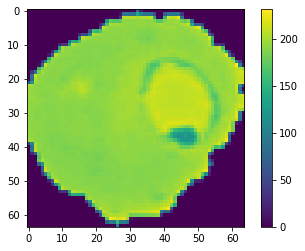

In [11]:
# Shape of labels 

plt.imshow(train_images[0][:,:,0])
plt.colorbar()

####<b> Observations and insights: 

*   The shape of the data shows that there are 24,958 images in the training dataset and 2,600 images in the test dataset. 
*  In this dataset there are 64 rows, 64 columns and 3 dimensions (Red, Green, and Blue)




### <b>Check the minimum and maximum range of pixel values for train and test images

In [12]:
# Try to use min and max function from numpy

#training data
print("Training Data")
print('The minimum pixels for training images is', np.min(train_images)), print('and the maximum pixels for training images is',np.max(train_images))
print("Test Data")
print('The minimum pixels for test images is', np.min(test_images)), print('and the maximum pixels for test images is',np.max(test_images))

Training Data
The minimum pixels for training images is 0
and the maximum pixels for training images is 255
Test Data
The minimum pixels for test images is 0
and the maximum pixels for test images is 255


(None, None)

####<b> Observations and insights: 

*   The minimum pixel value is 0 and the maximum pixel value is 255. This is the most commen pixel format, where the number is stored as an 8-bit integer. Often 0 is black and 255 is white. 





###<b> Count the number of values in both uninfected and parasitized 

In [13]:
# Try to use value_counts to count the values

#Training Data
print('Count of Training Data')
df_train_labels = pd.DataFrame(train_labels)
print(df_train_labels.value_counts())
print('*' * 40)

#Test Data
print('Count of Test Data')
df_test_labels = pd.DataFrame(test_labels)
print(df_test_labels.value_counts())
print('*' * 40)

Count of Training Data
1    12582
0    12376
dtype: int64
****************************************
Count of Test Data
0    1300
1    1300
dtype: int64
****************************************


###<b>Normalize the images

In [14]:
# Try to normalize the train and test images by dividing it by 255 and convert them to float32 using astype function
train_images = (train_images/255).astype('float32')

test_images = (test_images/255).astype('float32')

####<b> Observations and insights: 


*   The training data has 12582 parasitized images and 12376 uninfected images 
*   The test dataset has an equal number of images for both parasitized and uninfected images (1300 images each)



###<b> Plot to check if the data is balanced

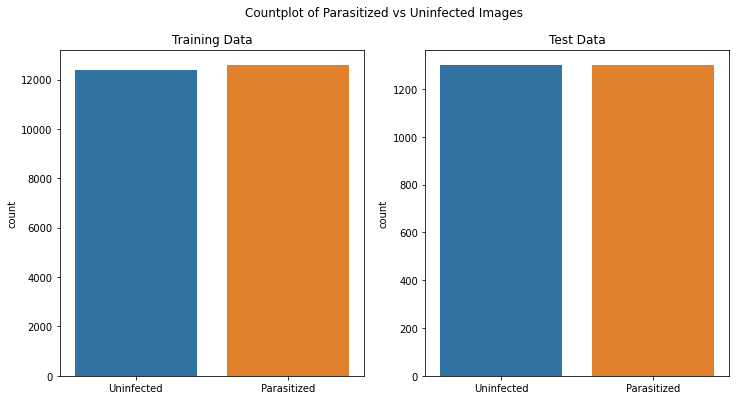

In [31]:
# You are free to use bar plot or pie-plot or count plot, etc. to plot the labels of train and test data and check if they are balanced

#Training Data
fig, ax = plt.subplots(figsize=(12, 6))
fig.suptitle('Countplot of Parasitized vs Uninfected Images')
plt.subplot(1, 2, 1)
sns.countplot(x=train_labels)
plt.title('Training Data')
ax = plt.gca()
ax.set_xticklabels(["Uninfected", "Parasitized"])

#Test Data
plt.subplot(1, 2, 2)
sns.countplot(x=test_labels)
plt.title('Test Data')
ax = plt.gca()
ax.set_xticklabels(["Uninfected", "Parasitized"])
plt.show()



####<b> Observations and insights: 


*   Both of these graphs show that the data is balanced and thus we can proceed with the data analysis.


### <b>Data Exploration</b>
Let's visualize the images from the train data

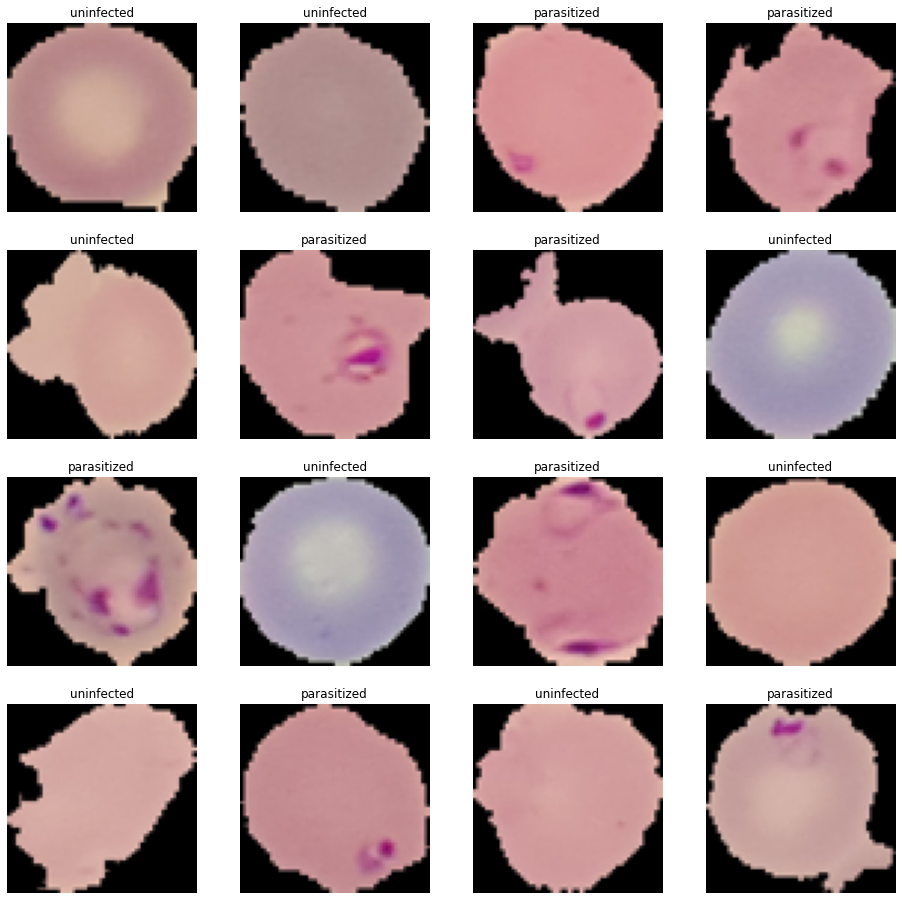

In [16]:
# This code will help you in visualizing both the parasitized and uninfected images
np.random.seed(42)

plt.figure(1, figsize = (16 , 16))

for n in range(1, 17):

    plt.subplot(4, 4, n)

    index = int(np.random.randint(0, train_images.shape[0], 1))

    if train_labels[index] == 1: 

        plt.title('parasitized')

    else:
        plt.title('uninfected')

    plt.imshow(train_images[index])

    plt.axis('off')

####<b> Observations and insights: 


*   The microscope images and Giemsa-stained slides show up as colored images
*   The uninfected cells and parasitized cells are identified properly here
*   The parasitized cells have a purple Giemsa-stain which seems to be appropriately identified as parasitized. These Giemsa-stains bind to the DNA of the parasite, allowing the technician to image the infected cell within the same day



###<b> Similarly visualize the images with subplot(6, 6) and figsize = (12, 12)

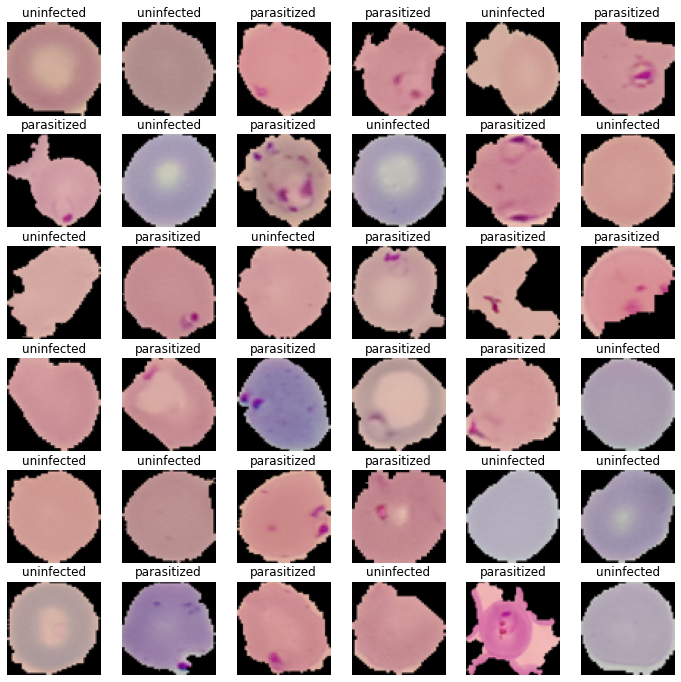

In [17]:
# Hint: Have a keen look into the number of iterations that the for loop should iterate
np.random.seed(42)

plt.figure(1, figsize = (12 , 12))

for n in range(1, 37):

    plt.subplot(6, 6, n)

    index = int(np.random.randint(0, train_images.shape[0], 1))

    if train_labels[index] == 1: 

        plt.title('parasitized')

    else:
        plt.title('uninfected')

    plt.imshow(train_images[index])

    plt.axis('off')


####<b>Observations and insights:

*   The code here allows for random images to be pulled from the dataset so that we can verify over 36 images that the images are correctly labeled and to better identify how the technician did with the staining, the quality of the images, and other image quality checking measures. 




###<b> Plotting the mean images for parasitized and uninfected

In [18]:
# Function to find the mean
def find_mean_img(full_mat, title):

    # Calculate the average
    mean_img = np.mean(full_mat, axis = 0)[0]

    # Reshape it back to a matrix
    plt.imshow(mean_img)

    plt.title(f'Average {title}')

    plt.axis('off')

    plt.show()

    return mean_img

<b> Mean image for parasitized

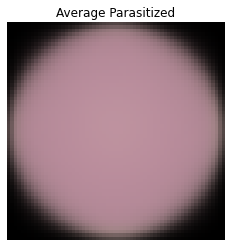

In [19]:
# If the label = 1 then the image is parasitised and if the label = 0 then the image is uninfected
parasitized_data = []  # Create a list to store the parasitized data

for img, label in zip(train_images, train_labels):

        if label == 1:
              
              parasitized_data.append([img])          

parasitized_mean = find_mean_img(np.array(parasitized_data), 'Parasitized')   # find the mean

<b> Mean image for uninfected

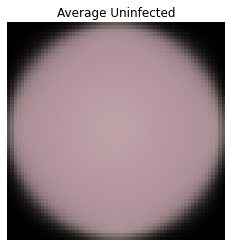

In [20]:
# Similarly write the code to find the mean image of uninfected
uninfected_data = []  # Create a list to store the parasitized data

for img, label in zip(train_images, train_labels):

        if label == 0:
              
              uninfected_data.append([img])          

parasitized_mean = find_mean_img(np.array(uninfected_data), 'Uninfected')   # find the mean

####<b> Observations and insights: 

*   When the images are averaged, you are able to visualize that the parasitized images are a deeper red than the uninfected images due to the purple from the Giemsa stain



### <b>Converting RGB to HSV of Images using OpenCV

###<b> Converting the train data

In [21]:
import cv2

gfx=[]   # to hold the HSV image array

for i in np.arange(0, 100, 1):

  a = cv2.cvtColor(train_images[i], cv2.COLOR_BGR2HSV)
  
  gfx.append(a)

gfx = np.array(gfx)

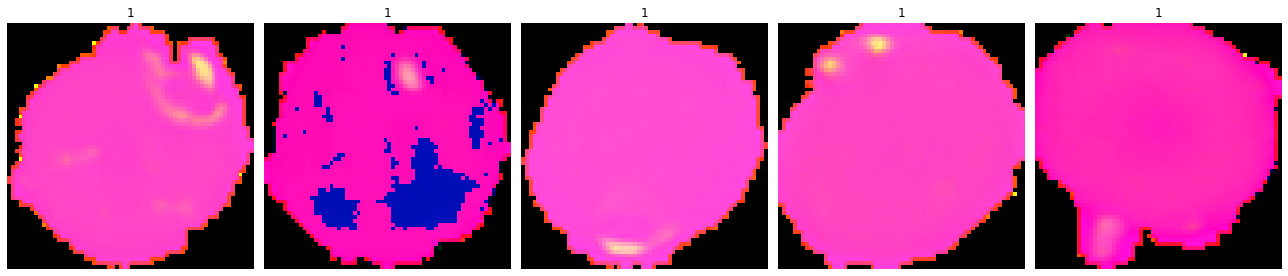

In [22]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx[i])

  ax[t].set_axis_off()
  
  fig.tight_layout()

###<b> Converting the test data

In [23]:
# Similarly you can visualize for the images in the test data
import cv2

gfx=[]   # to hold the HSV image array

for i in np.arange(0, 100, 1):

  a = cv2.cvtColor(test_images[i], cv2.COLOR_BGR2HSV)
  
  gfx.append(a)

gfx = np.array(gfx)

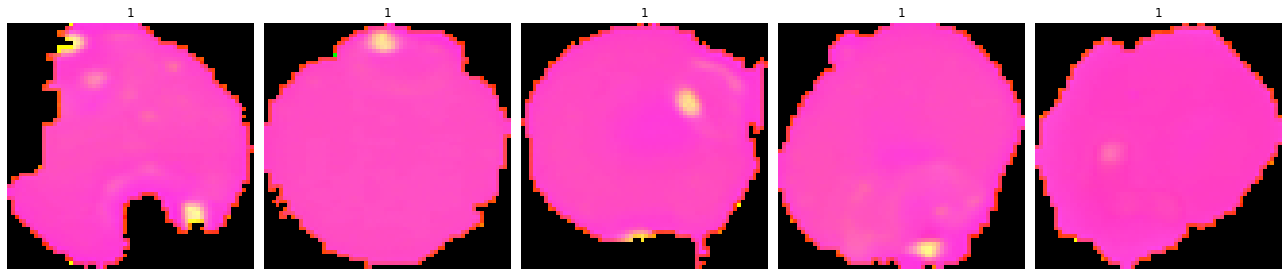

In [24]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = test_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx[i])

  ax[t].set_axis_off()
  
  fig.tight_layout()

####<b>Observations and insights: 

*   Here we are using data augmentation methods where we are changing the images to HSV to potentially better visualize the parasitized cells. From the images, it visually looks easier to see the parasitized cells than the RGB parasitized cells. 



###<b> Processing Images using Gaussian Blurring

###<b> Gaussian Blurring on train data

In [25]:
gbx = []  # To hold the blurred images

for i in np.arange(0, 100, 1):

  b = cv2.GaussianBlur(train_images[i], (5, 5), 0)

  gbx.append(b)

gbx = np.array(gbx)

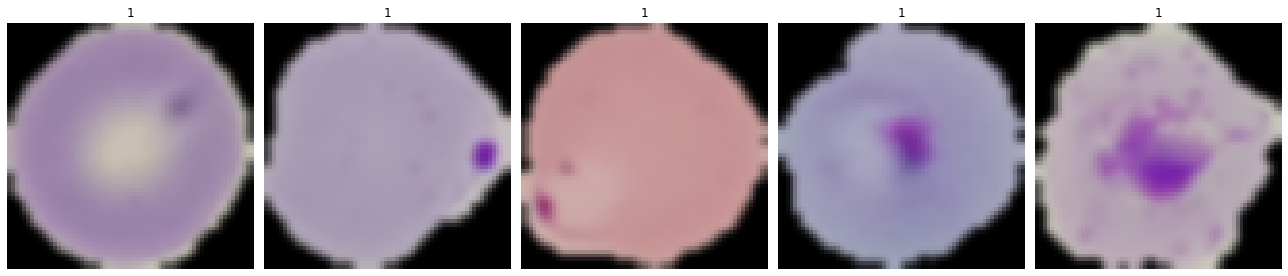

In [26]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)

  
  ax[t].imshow(gbx[i])
  
  ax[t].set_axis_off()
  
  fig.tight_layout()

###<b> Gaussian Blurring on test data

In [27]:
# Similarly you can apply Gaussian blurring for the images in the test data
gbx = []  # To hold the blurred images

for i in np.arange(0, 100, 1):

  b = cv2.GaussianBlur(test_images[i], (5, 5), 0)

  gbx.append(b)

gbx = np.array(gbx)

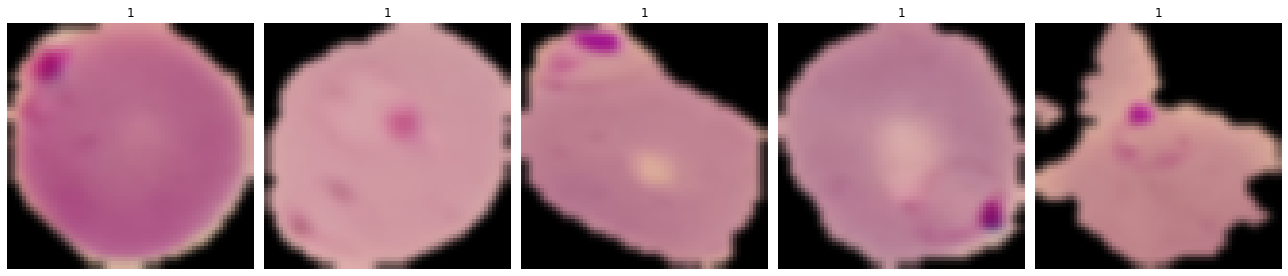

In [28]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = test_labels[i]

  ax[t].set_title(Title)

  
  ax[t].imshow(gbx[i])
  
  ax[t].set_axis_off()
  
  fig.tight_layout()

####**Observations and insights: **

*   Gaussian blurring is a technique that can be used to smooth out noise or small details in an image. In the context of detecting parasitized or uninfected cells in Giemsa-stained images, it could potentially be used to help the neural network focus on the important features of the image, such as the presence of parasites.
*   Excessive blurring can lead to loss of important information, and it could make it more difficult for the neural network to identify the presence of parasites. 
*   In this instance, it is not clear that Guassian blurring is creating a benefit to the parasitized images. 
*   There are other pre-processing techniques that can be used to enhance image features, like contrast stretching, normalization, and histogram equalization. These techniques can be used in combination with Gaussian blurring to improve the performance of the neural network.


## **Proposed approach**

**Potential techniques:** 

There are several techniques that can be explored to improve the performance. Some of these techniques used to imprve the preformce include:

- Image enhancement: techniques like contrast stretching, normalization and histogram equalization can be used to enhance the features of the image.

- Image segmentation: techniques like thresholding, edge detection, and morphological operations can be used to segment the image and idetify the cells of interest.

- Image registration: techniques like image alignment and image warping can be used to align images that were taken at different times or with different devices, making it easier for the neural network to compare images and identify patterns.

- Feature extracion: This can be used to extract features from the images, this can be useful for reducing the amount of data that the neural network needs to process, and make it more efficient.

- Further data augmentation: techniques like rotation, flipping, and zooming can be used to create new training samples from existing images. 

These techniques can be used in combination to improve the performance of the neural network. Its also important to test different combinations of these techniques to find the best approach for your specific dataset.

**Overall solution design:** 

The potential solution design for a neural network that uses Giemsa-stained images to detect parasitized and uninfected patients would likely involve several key components which include appropriate processing the data prior to submitting the data to the neural network, then design the neural network architecture that will be used to classify the images, the next step would be to train the network using the preprocessed images and their corresponding labels, the network is then trained and evaluated on the test set, and lastly it could be deployed to classify new images. Depending on the perfomance there might be a need for further features, images, or techniques as described above. In Milestone 2 there will be more information on which technique will be most useful. 

**Measures of success:** 
The key measures of success are typically, accuracy,precision, recall, and specificity among others. There are numerous metrics to use to evaluate performance. Additionally, especially in a model such as this it is critical to visual inspections and to test the model on unseen data for appropriately diagnosed patients.